

> Zadanie zostanie przeprowadzone na datasecie Wine z biblioteki sklearn



In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True))
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


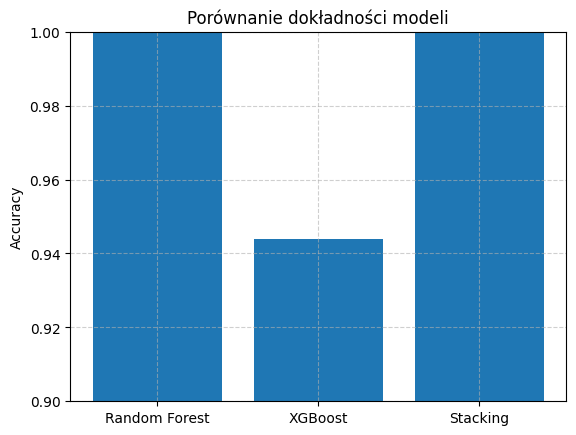

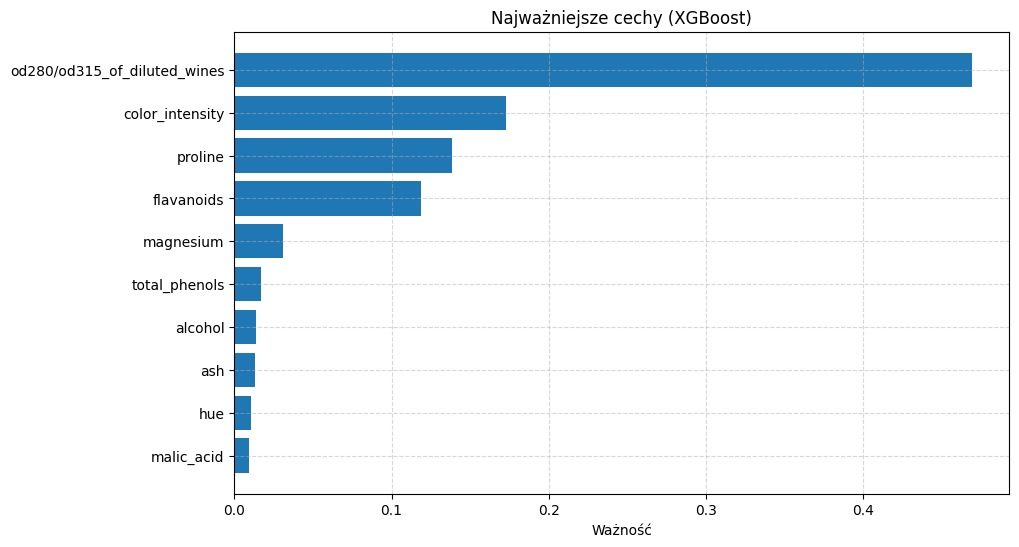

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'XGBoost', 'Stacking']
accuracies = [1.0, 0.944, 1.0]  # przykładowe wartości

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Porównanie dokładności modeli')
plt.ylim(0.9, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

importances = xgb.feature_importances_
indices = np.argsort(importances)[-10:][::-1]  # top 10
features = load_wine().feature_names

plt.figure(figsize=(10, 6))
plt.title("Najważniejsze cechy (XGBoost)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Ważność')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Jak widać modele Random Forest oraz Stackin g poradziły  sobie bardzo dobrze z klasyfikacją datasetu Wines. Model XGBoost poradził sobie gorzej (dokładność 0.94), dlatego spróbujemy dobrać hiperparametry

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", grid_search.best_params_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}


In [ ]:
y_pred = grid_search.predict(X_test)
print("Dokładność po zastosowaniu hyperpartameter tuning:  ", accuracy_score(y_test, y_pred))

Dokładność po zastosowaniu hyperpartameter tuning:   1.0


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, learning_rate = 0.1, max_depth = 3, subsample = 0.5,  eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:27:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Po zastosowaniu tuningu hiperparametrów wszystkie 3 modele posiadają 100% skuteczności.

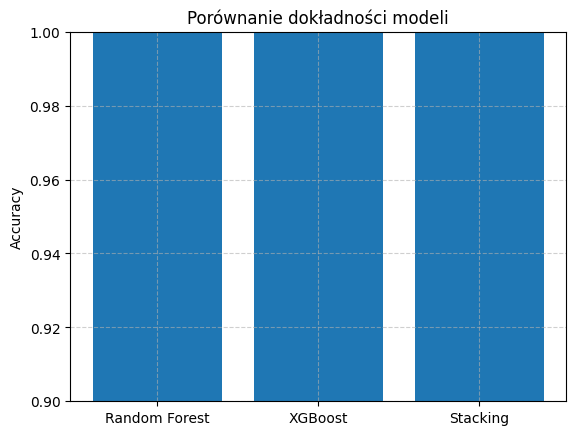

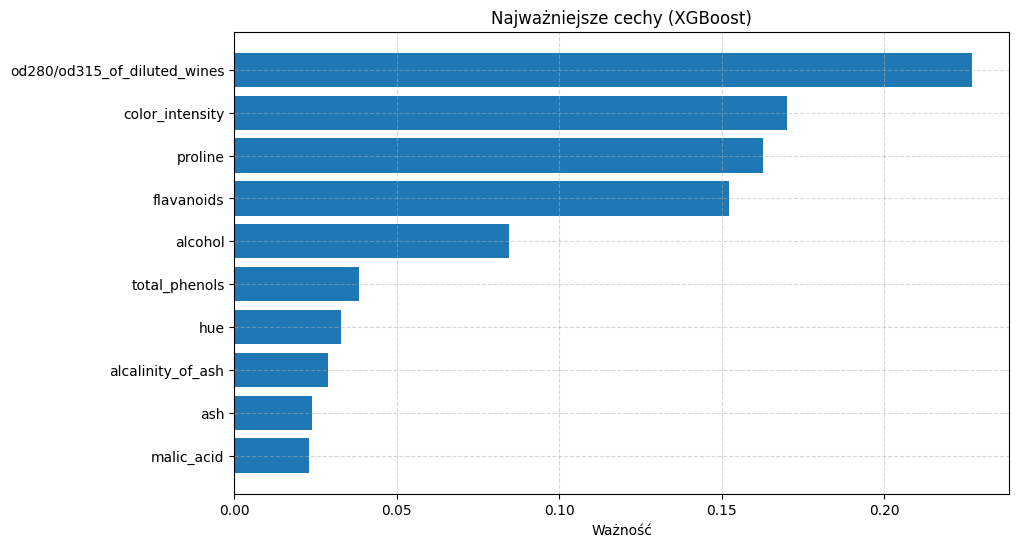

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'XGBoost', 'Stacking']
accuracies = [1.0, 1.0 , 1.0]  # przykładowe wartości

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Porównanie dokładności modeli')
plt.ylim(0.9, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

importances = xgb.feature_importances_
indices = np.argsort(importances)[-10:][::-1]  # top 10
features = load_wine().feature_names

plt.figure(figsize=(10, 6))
plt.title("Najważniejsze cechy (XGBoost) - PO HYPERPARAMETER TUNING")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Ważność')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Teraz spróbuyjemy zastosować tę samą ścieżkę nauczania dla innego datasetu:

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9722222222222222


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9694444444444444


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True))
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9888888888888889


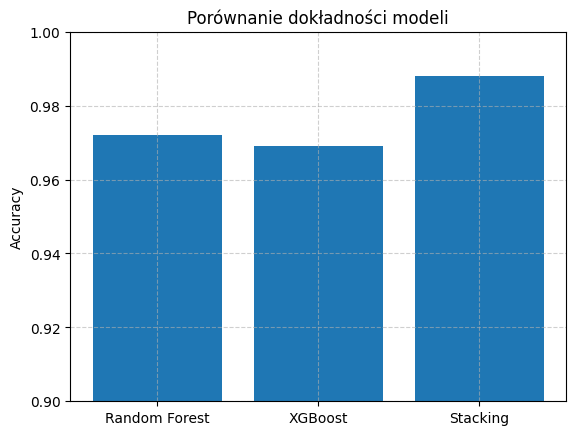

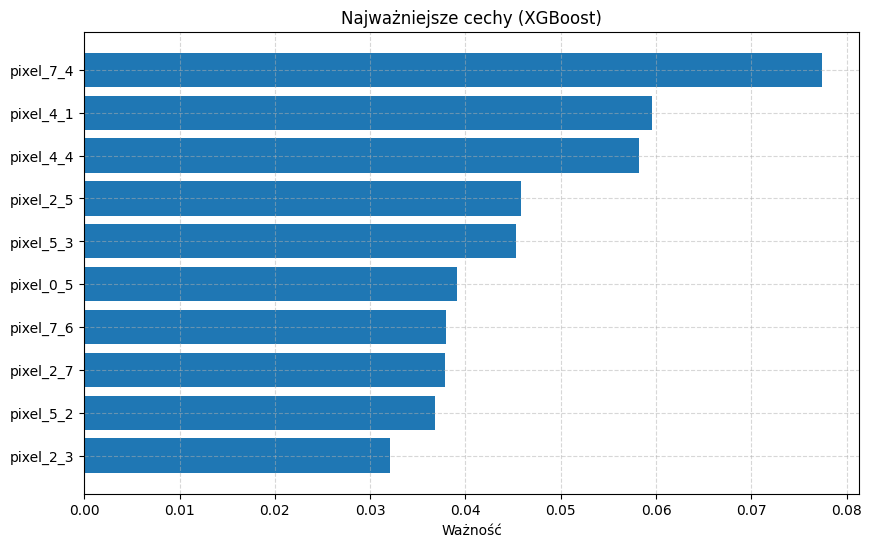

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'XGBoost', 'Stacking']
accuracies = [0.972, 0.969, 0.988]  # przykładowe wartości

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Porównanie dokładności modeli')
plt.ylim(0.9, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

importances = xgb.feature_importances_
indices = np.argsort(importances)[-10:][::-1]  # top 10
features = load_digits().feature_names

plt.figure(figsize=(10, 6))
plt.title("Najważniejsze cechy (XGBoost)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Ważność')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", grid_search.best_params_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}


Spróbujemy teraz ponownie nauczyć algorytm z najlepszymi wybranymi hiperparametrami

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, learning_rate = 0.1, max_depth = 7, subsample = 0.7,  eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:49:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9694444444444444
